# Wstęp do uczenia maszynowego
##  Projekt nr 1
#### Jakub Piwko, Malwina Wojewoda

#### Pakiety

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)
from sklearn.model_selection import train_test_split

### Dane i ich opis

In [8]:
census_df = pd.read_csv('census_income_dataset.csv')
census_df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582.0,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,160187.0,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642.0,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,45781.0,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,159449.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [4]:
pd.set_option('display.max_colwidth', -1)
descr = pd.read_csv('attributes_census_income.csv')
descr

,name,type,description
0,age,integer,age of individual
1,workclass,string,"Values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked"
2,fnlwgt,float,Final sampling weight. Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups
3,education,string,"Values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool"
4,education_num,integer,NaN
5,marital_status,string,"Values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse"
6,occupation,string,"Values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces"
7,relationship,string,"Values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried"
8,race,string,"Values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black"
9,sex,string,"Values: Female, Male"


## Ekspoloracja danych

#### Analiza braków danych

In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education_num   48842 non-null  int64  
 5   marital_status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital_gain    48842 non-null  float64
 11  capital_loss    48842 non-null  float64
 12  hours_per_week  48842 non-null  float64
 13  native_country  48842 non-null  object 
 14  income_level    48842 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.6+ MB


W ramce danych nie wystąpują wartości None/Null. Z opisu ramki wiemy, że takowe braki, jeśli występują, są zakodowane odpowiednimi wartościami w kolumnach:  **?** dla danych nominalnych oraz **-100000** dla numerycznych. Sprawdźmy, ile rekordów z takimi wartościami występują w ramce.

In [6]:
census_df[census_df == -100000].count()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_level      0
dtype: int64

In [7]:
census_df[census_df == "?"].count()

age               0   
workclass         2799
fnlwgt            0   
education         0   
education_num     0   
marital_status    0   
occupation        2809
relationship      0   
race              0   
sex               0   
capital_gain      0   
capital_loss      0   
hours_per_week    0   
native_country    857 
income_level      0   
dtype: int64

Okazuje się, że mamy braki w kolumnach `workclass`, `occupation` i `workclass`. Z czego dwie pierwsze kolumny w oczywisty sposób są powiązane, bo brak zawodu może automatycznie oznaczać brak klasy roboczej. 

##### Średnia, wartości minimalne itd. 
Warto sprawdzić jaka jest średnia, odchylenie standardowe, wartość minimalna, maksymalna oraz kwartyle danych w poszczególnych kolumnach.

In [7]:
census_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Już dzięki temu zestawieniu możemy powiedzieć coś o danych. Można stwierdzić, że dużo osób pracuje 40 godzin tygodniowo. Porównując średnie z wartościami minimalnymi i maskymalnymi dla kolumny `capital_gain` i `capital_loss` można stwierdzić, że wartości są bardzo rozchwiane i występują obserwacje odstające. Przyjrzyjmy sie histogramom. 

#### Rozkłady zmiennych


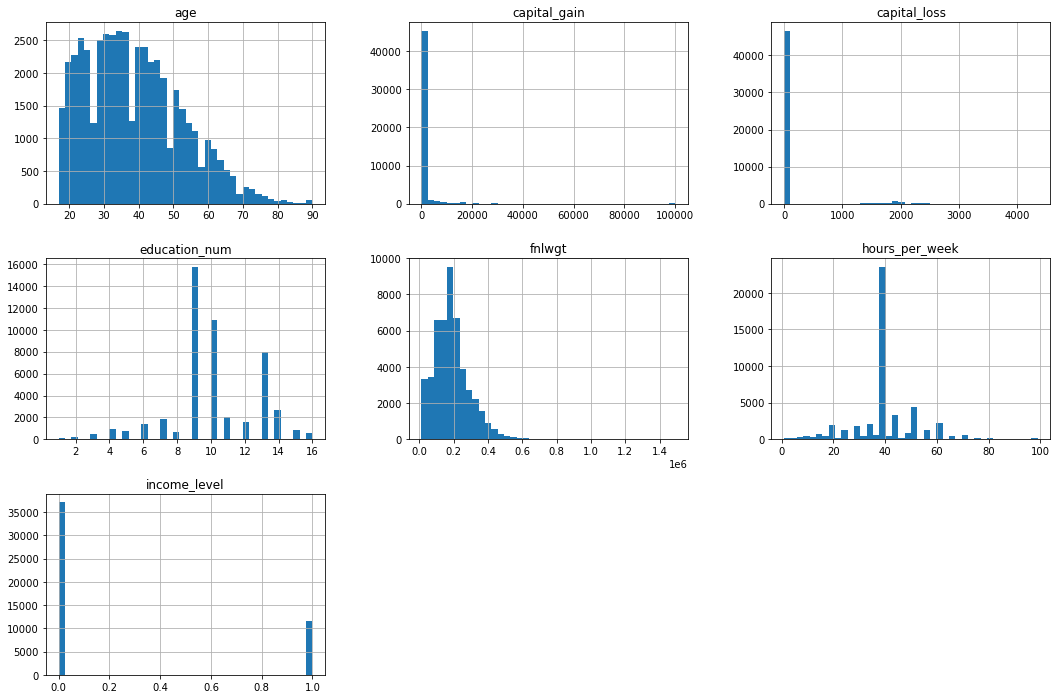

In [52]:
census_df.hist(figsize=(18, 12), bins=40)
plt.show()

Wspomniane wcześniej wnioski się potwirerdzają. Najwięcej osób pracuje 40 godzin tygodniowo, choć znajdują się osobu pracujące powyżej 80. Kolumny `capital_gain` i `capital_loss` wyglądają niekorzytsnie, gdyż mają przeważającą liczbę obserwacji zerowych. Wiek ma dosyć regularny rozkład, ale bardziej skośny w stronę osób młodszych. Jak wynika z opisu, kolumna `fnlwgt` jest parametrem, który ma oddawać wagę danego rekordu. Oznacza to więc, że nie będzie miała znaczenia dla oceny zaróbków. Z kolei zmienna edycation_num wydaje się być zmienną kategoryczną. 

In [23]:
census_df[['education', 'education_num', 'age']].groupby(['education', 'education_num']).count().sort_values(by = "education_num")

,,age
education,education_num,
Preschool,1,83
1st-4th,2,247
5th-6th,3,509
7th-8th,4,955
9th,5,756
10th,6,1389
11th,7,1812
12th,8,657
HS-grad,9,15784


Z zsumowania rekordów zawierających unikalne pary `education` + `education_num` wynika, że ta druga kolumna jest tylko numerycznym zakodowaniem kolumny opisującej osiągnięty etap edukacji z zachowaniem porządku. 

Zamiana wartości ostatniej kolumny:
* z <=50K na 0
* z >50K na 1

In [25]:
census_df['income_level'] = census_df['income_level'].replace(['<=50K','>50K'],[0, 1])

##### Korelacje

In [96]:
fig_corr = px.imshow(census_df.corr(), color_continuous_scale='RdBu_r', range_color=(-0.5,0.5))
fig_corr.show()

Interesuje nas jak zmienne korelują ze zmienną `income_level`, ponieważ właśnie ją będziemy przewidywać. Widać, że wszytskie, z wyjątkiem `fnlwgt`, korelują z nią dodatnio. 

In [24]:
#NIE WIEM COŚ KOJARZE ŻE MÓWIŁ ŻE WSZYTSKIE MAJĄ KORELOWAĆ W TEN SAM SPOSÓB AL ENIE JESTEM PEWNA

#OJ JA NIE WIEM, ALE W SUMIE WSZYTSKIE KORELUJĄ DODATNIO, A TO FNLWGT JEST NIE ISTOTNE, WIĘC JEST W PYTE ;)

In [37]:
census_df['income_level'].value_counts()

0    37155
1    11687
Name: income_level, dtype: int64

Dodatkowo warto wiedzieć, że znacznie mniej osób zarabia powyżej progu 50K$. Teraz przyjrzyjmy sie rozkładom zmiennych typowo ciągłych z 

***age***

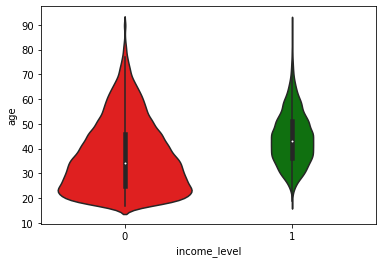

In [43]:
sns.violinplot(y = census_df['age'], x = census_df['income_level'], palette=["red", "green"], scale = "count")
plt.show()

Z rozkładu zmiennej `age` z uwzględnieniem podziału na poziom zarobków, można stwierdzić, że wśród osobów zarabiających lepiej, rozkład przesuwa się w stronę osób starszych.

***hours_per_week***

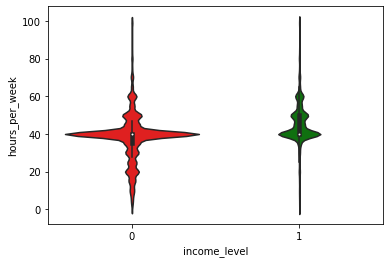

In [44]:
sns.violinplot(y = census_df['hours_per_week'], x = census_df['income_level'], palette = ['red', 'green'], scale = "count")

Dzięki zachowaniu skali ilości na wykresach można zauważyć tendecję, że osoby które pracują więcej, zarabiają lepiej. Świadczy o tym skupienie prawie wszystkich obserwacji powyżej poziomu 35h dla poziomu 1, podczas, gdy dla poziomu 0 widać duży peak w okolicach 40, ale dużą liczbę obserwacji poniżej tej wartości.  

Jako, że zmienne `capital_gain` i `capital_loss` także są typowo ciągłe, żeby uwzględnić ich rozkłady pozbędziemy się najpierw obserwacji, dla których kolumny są zerowe

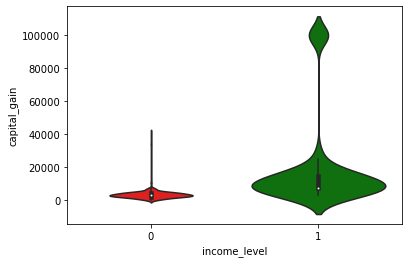

In [48]:
df = census_df[census_df['capital_gain'] > 0]
sns.violinplot(y = df['capital_gain'], x = df['income_level'], palette = ['red', 'green'], scale = "count")

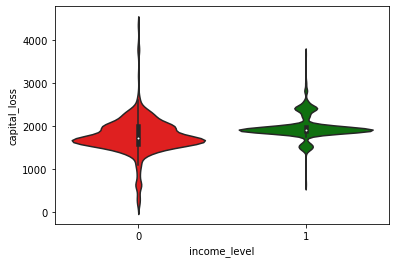

In [49]:
df = census_df[census_df['capital_loss'] > 0]
sns.violinplot(y = df['capital_loss'], x = df['income_level'], palette = ['red', 'green'], scale = "count")

In [ ]:
## Chyba to wyżej w sumie bez sensu to jest, bo nie ma wyraźnych zaleności tylko jakieś pitu pitu

Teraz przyjrzymy się zależnościom między zmiennymi kategorycznymi i zmienną poziomującą zarobki

***native country***

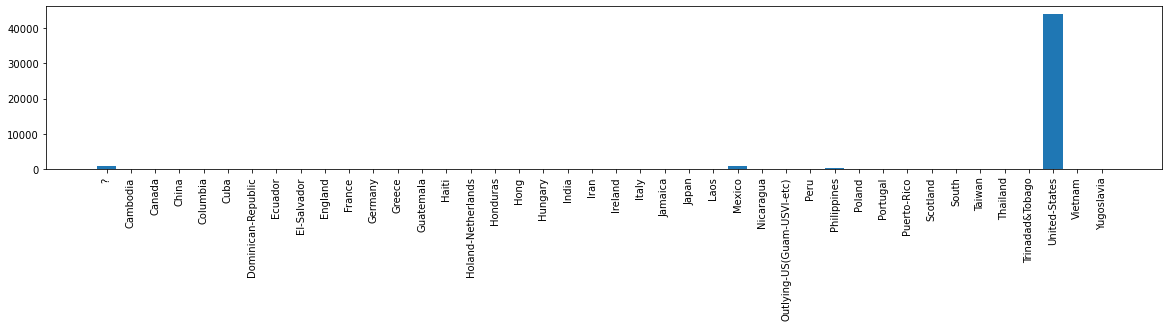

In [64]:
plt.figure(figsize=(20, 3))
plt.xticks(rotation = 90)
df = census_df.groupby(['native_country']).size().reset_index(name='counts')
plt.bar(x="native_country", height="counts", data=df);
plt.show()

Jako że przeważająca liczba osób ze zbioru pochodzi ze Stanów Zjednoczonych, dla efektywniejszego wyciągania wniosków lepiej będzie zbadać procentowy udział osób zarabiających na danym poziomie w każdym z krajów.

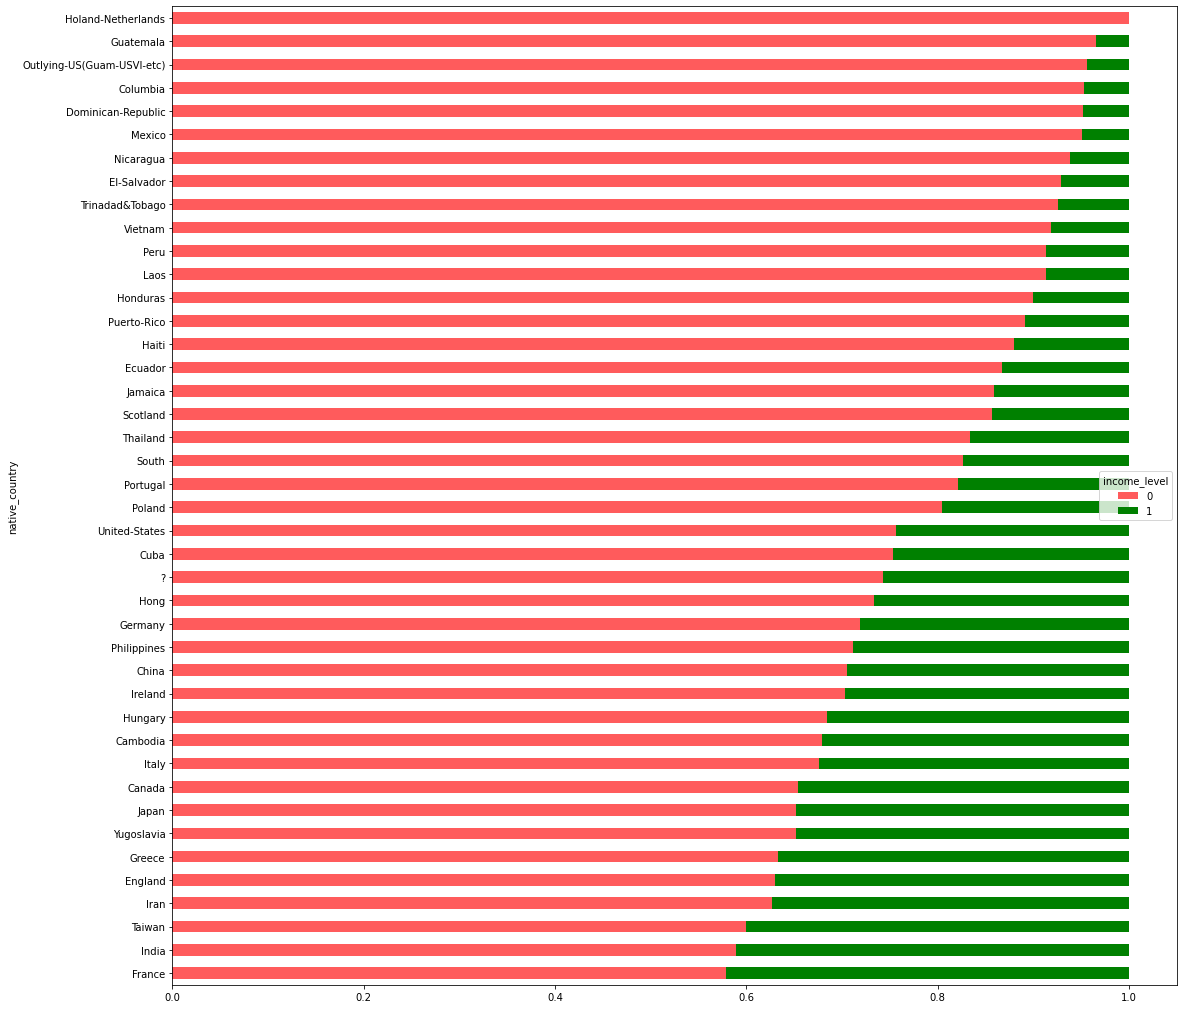

In [81]:
df = census_df.groupby('native_country')["income_level"].value_counts(normalize = True).unstack('income_level').sort_values(by = 1, ascending = False)
df.plot.barh(stacked=True, figsize = (18, 18), color = ['#ff5b5c', 'green'])
plt.show()

Widać, że wśród krajów, z których najmniejszy procent zarabia powyżej 50K to kraje Ameryki Środkowej. Po drugiej stronie przeważają z kolei kraje Europy i Azji. Można stwierdzić, że zależy to od rozwoju danych krajów. Oczywiste jest, że w tych bardziej rozwiniętych łatwiej jest o wyższe zarobki.  

***educational_num***

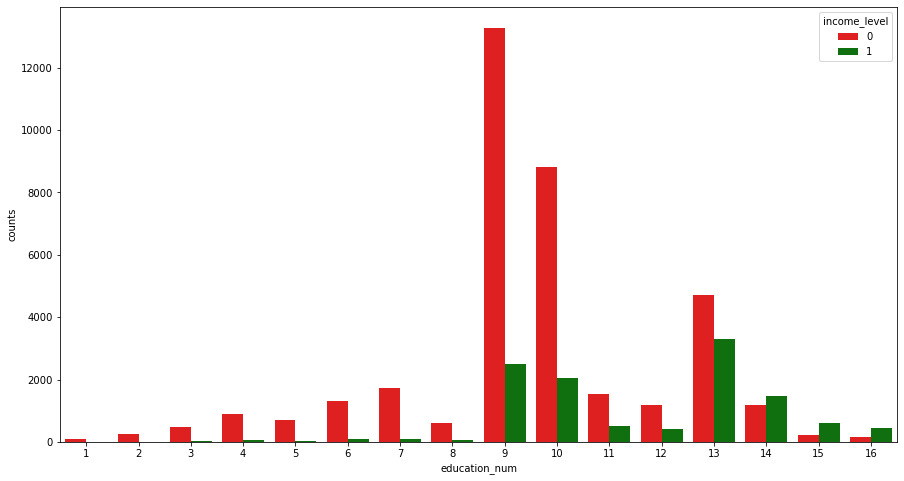

In [91]:
plt.figure(figsize=(15,8))
df = census_df.groupby(['education_num', 'income_level']).size().reset_index(name='counts')
sns.barplot(x="education_num", y="counts", hue="income_level", data=df, ci=None, palette=["red", "green"]);
plt.show()

Możemy zaobserwować, że najwięcej osób z naszej próbki ma wykształcenie średnie (9 - HS-grad) lub uczęszczali na studia ale nie zdobyli stopnia naukowego (10 - some college). Dużo jest także osób ze stopniem licencjackim (13 - Bachelor). Widać wyrażnie, że im wyższy poziom w naukowej drabince, tym osób zarabiających powyżej 50K jest coraz więcej w stosunku do tych zarabiających mniej. Dla stopni powyżej magistra (od 14 - Masters) osób oznaczone numerem 1 przeważają. 

***marital_status***

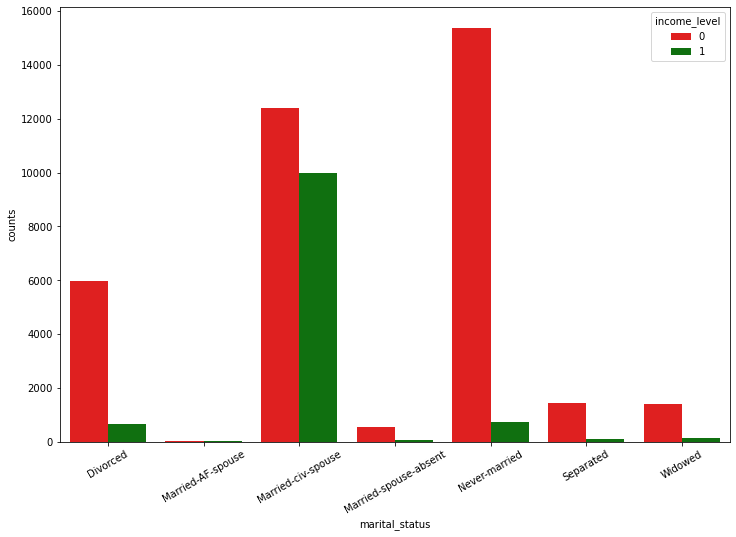

In [95]:
plt.figure(figsize=(12,8))
df = census_df.groupby(['marital_status', 'income_level']).size().reset_index(name='counts')
sns.barplot(x="marital_status", y="counts", hue="income_level", data=df, ci=None, palette=["red", "green"]);
plt.xticks(rotation = 30)
plt.show()

Największe grupy osób są w związku z małżeńskim z osobą cwyilną, ewentualnie nigdy nie zawierały takiego związku lub są rozwiedzione. Pozostałe grupy są wyraźnie mniej liczne, a najmniejszą stanowią osoby w związku małzeńskim z osobą wojskową. W każdej grupie jest przewaga osób zarabiających mniej niż 50K. Jednak grupa małzeństw z osobami cywilnymi wyróżnia się najbardziej wyrównaną proporcją osób o różnym poziomie zarobków, podczas gdy wśród pozostałych zdecydowanie więcej osób nie zarabia więcej niz 50K. Może to nasuwać wniosek, że osoby w związku małżeńskim mają większą szansę na stabilność finansową, a co za tym idzie, lepsze zarobki w ogólności. 

# CIĄG DALSZY NASTĄPI.... 

In [ ]:
plt.figure(figsize=(10,7))
sns.swarmplot(x="workclass", y="age", data=census_df, hue='income_level', dodge=True, palette=["green", "red"])
plt.show()